<a href="https://colab.research.google.com/github/fathanick/Text-analytics-course-UII/blob/main/01_Text_clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**Step 2: Prepare the Dataset**

In [ ]:
# Sample data
documents = [
    "I love machine learning and data science.",
    "Data science is fascinating.",
    "Machine learning is a part of artificial intelligence.",
    "Python is a great programming language.",
    "Natural language processing with Python is amazing.",
    "K-means is a clustering algorithm used in machine learning.",
    "I enjoy learning about artificial intelligence and algorithms.",
    "The world of data science and AI is ever-growing.",
    "Python is often used for machine learning.",
    "Natural language processing is a subfield of AI."
]

**Step 3: Convert Text to Numerical Data**

We will use TfidfVectorizer to convert our text data into TF-IDF features suitable for clustering.

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

**Step 4: Implement K-Means Clustering**

We will initialize K-Means with a specified number of clusters (e.g., k=3). Then, we’ll fit the model to the transformed text data.

In [ ]:
# Number of clusters
num_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

**Step 5: Assign and View Clusters**

After fitting the model, we can check which documents belong to which clusters.

In [ ]:
# Add cluster labels to documents
clusters = kmeans.labels_

# Create a DataFrame to display the documents with their cluster labels
df = pd.DataFrame({'Document': documents, 'Cluster': clusters})
print(df)

                                            Document  Cluster
0          I love machine learning and data science.        0
1                       Data science is fascinating.        0
2  Machine learning is a part of artificial intel...        2
3            Python is a great programming language.        1
4  Natural language processing with Python is ama...        1
5  K-means is a clustering algorithm used in mach...        0
6  I enjoy learning about artificial intelligence...        2
7  The world of data science and AI is ever-growing.        0
8         Python is often used for machine learning.        0
9   Natural language processing is a subfield of AI.        1


**Step 6: (Optional) Visualize Clusters**

To visualize clusters, reduce the TF-IDF features to 2D using PCA.

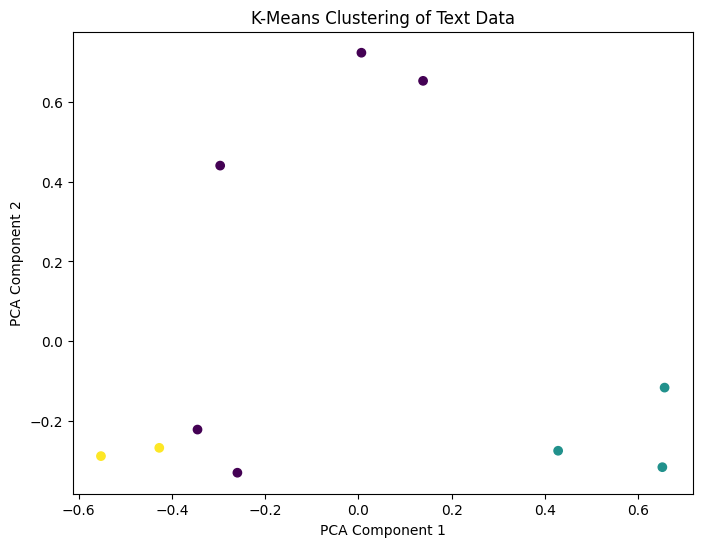

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Text Data')
plt.show()